# Global Imports

In [1]:
import numpy as np
from numpy.linalg import eig, norm
from qiskit.circuit.library import TwoLocal
import random


# Local Imports

In [2]:
from hamiltonians import gen_maxcut_op, get_exact_ground
from mub_state_gen import generate_all_subsets
from landscape import calculate_energy_landscape, find_k_best_results
from graphing import display_energy_landscape, display_energy_histogram
from vqe import Parameters, get_standard_params, run_vqe_experiment

# Example Experiment

In [3]:
n_qubits = 4
n_mub_qubits = 3
edges = [(0, 1), (0, 2), (0, 3), (1, 2), (2, 3)]
op = gen_maxcut_op(n_qubits, edges)
ansatz = TwoLocal(n_qubits, 'ry', 'cx', 'linear', reps=2, insert_barriers=True).decompose()
zeroset_anastz = ansatz.assign_parameters([0.0]*ansatz.num_parameters)
print(zeroset_anastz)
print(f"attempting all MUB states over the operator {op}")
results = calculate_energy_landscape(op, n_mub_qubits, generate_all_subsets(n_mub_qubits, n_qubits), appended_ansatz=zeroset_anastz)
exact_result = get_exact_ground(op)



     ┌───────┐ ░                 ░ ┌───────┐ ░                 ░ ┌───────┐
q_0: ┤ Ry(0) ├─░───■─────────────░─┤ Ry(0) ├─░───■─────────────░─┤ Ry(0) ├
     ├───────┤ ░ ┌─┴─┐           ░ ├───────┤ ░ ┌─┴─┐           ░ ├───────┤
q_1: ┤ Ry(0) ├─░─┤ X ├──■────────░─┤ Ry(0) ├─░─┤ X ├──■────────░─┤ Ry(0) ├
     ├───────┤ ░ └───┘┌─┴─┐      ░ ├───────┤ ░ └───┘┌─┴─┐      ░ ├───────┤
q_2: ┤ Ry(0) ├─░──────┤ X ├──■───░─┤ Ry(0) ├─░──────┤ X ├──■───░─┤ Ry(0) ├
     ├───────┤ ░      └───┘┌─┴─┐ ░ ├───────┤ ░      └───┘┌─┴─┐ ░ ├───────┤
q_3: ┤ Ry(0) ├─░───────────┤ X ├─░─┤ Ry(0) ├─░───────────┤ X ├─░─┤ Ry(0) ├
     └───────┘ ░           └───┘ ░ └───────┘ ░           └───┘ ░ └───────┘
attempting all MUB states over the operator SparsePauliOp(['IIZZ', 'IZIZ', 'ZIIZ', 'IZZI', 'ZZII', 'IIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j, -2.5+0.j])


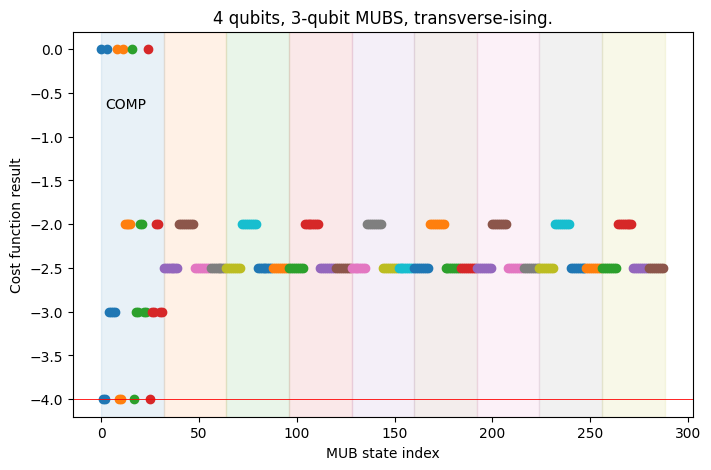

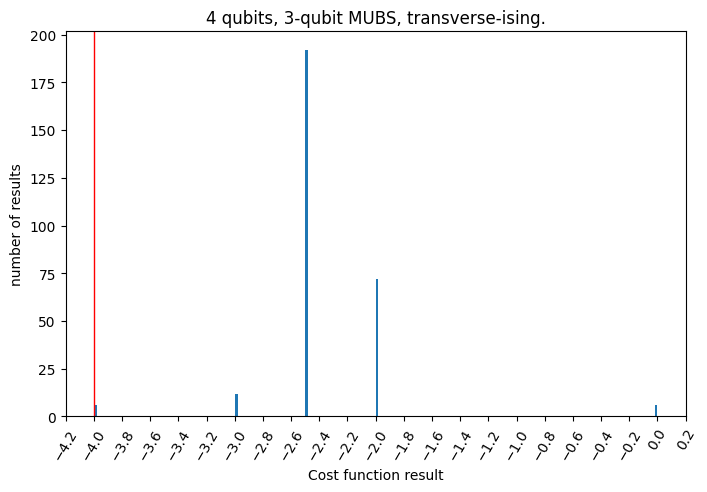

In [4]:
display_energy_landscape(results, exact_result, graph_title=f"{n_qubits} qubits, {n_mub_qubits}-qubit MUBS, transverse-ising.")
display_energy_histogram(results, exact_result, graph_title=f"{n_qubits} qubits, {n_mub_qubits}-qubit MUBS, transverse-ising.", bins=200)

## Combined Example with VQE

Energy Landscape:


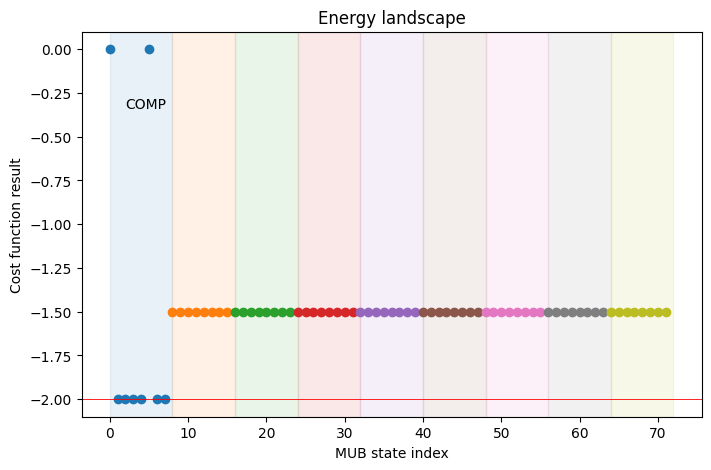

Energy Histogram:


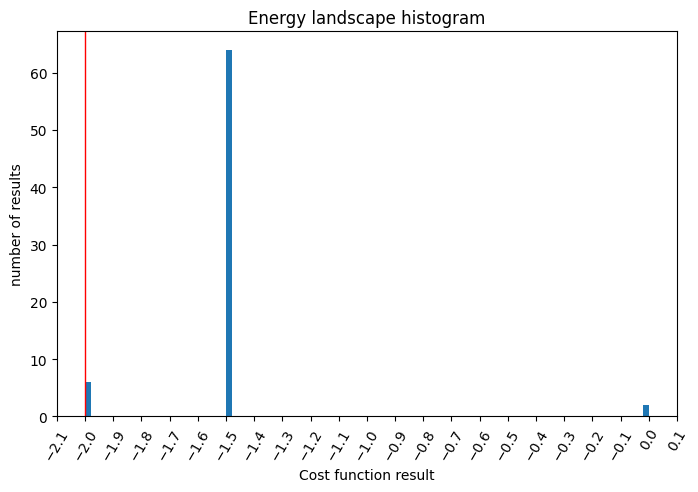

The operator SparsePauliOp(['IZZ', 'ZIZ', 'ZZI', 'III'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j, -1.5+0.j]) has the exact value -2.0.
Now trying to reach the vcalue from different MUB points.
running from point with value -2.0
WOLOLO!
(1, -2.0, True)
running from point with value -2.0
WOLOLO!
(1, -2.0, True)
running from point with value -2.0
WOLOLO!
(1, -2.0, True)
running from point with value -2.0
WOLOLO!
(1, -2.0, True)
running from point with value -2.0
WOLOLO!
(1, -2.0, True)
running from point with value -2.0
WOLOLO!
(1, -2.0, True)
running from point with value -1.5


Traceback (most recent call last):
  File "/Users/ittayalfassi/Documents/repos/Quantum-exhaustive-search/.venv/lib/python3.12/site-packages/scipy/optimize/_cobyla_py.py", line 281, in calcfc
capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.
Fatal Python error: F2PySwapThreadLocalCallbackPtr: F2PySwapThreadLocalCallbackPtr: PyLong_AsVoidPtr failed
Python runtime state: initialized
    f = sf.fun(x)
        ^^^^^^^^^
  File "/Users/ittayalfassi/Documents/repos/Quantum-exhaustive-search/.venv/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py", line 278, in fun
    self._update_fun()
  File "/Users/ittayalfassi/Documents/repos/Quantum-exhaustive-search/.venv/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py", line 262, in _update_fun
    self._update_fun_impl()
  File "/Users/ittayalfassi/Documents/repos/Quantum-exhaustive-search/.venv/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py", line 163, 

WOLOLO!


: 

In [5]:
# generate operator
n_qubits = 3
n_mub_qubits = 3
edges =[(0,1), (1,2), (2,0)]
op = gen_maxcut_op(n_qubits, edges)
exact_result = get_exact_ground(op)

ansatz = TwoLocal(3, ['rx', 'ry', 'rz'], 'cx', 'linear', reps=3, insert_barriers=True).decompose()
zeroset_anastz = ansatz.assign_parameters([0.0]*ansatz.num_parameters)

# calculate landscape and graphs
results = calculate_energy_landscape(op, n_mub_qubits, generate_all_subsets(n_mub_qubits, n_qubits), appended_ansatz=zeroset_anastz)
exact_result = get_exact_ground(op)
print("Energy Landscape:")
display_energy_landscape(results, exact_result=exact_result)
print("Energy Histogram:")
display_energy_histogram(results, exact_result=exact_result)

# run VQE from the best 5 examples
params = get_standard_params(n_qubits)
params.success_bound = 1e-2
params.exact_result = exact_result
params.optimizer = 'COBYLA'
params.report_period=100
params.report_thetas=False

print(f"The operator {op} has the exact value {params.exact_result}.")
print(f"Now trying to reach the vcalue from different MUB points.")
for initial_state, value in find_k_best_results(results, 10):
    print(f"running from point with value {value}")
    try:
        print(run_vqe_experiment(op, ansatz, initial_state, params))
    except:
        print("AAAAAAAAAAAAAAAA")
    